In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import mean_squared_error
import keras
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from keras.layers import LSTM, Bidirectional, Dense
from tabulate import tabulate

In [ ]:
re=np.random.normal(0,1,10000)
f1 =10+re
f4 =10+re
f6 =10+re
f2=30+re
f3=30+re
f5=20+re
f7=10+re

f1o=np.full(10000,10)
f4o=np.full(10000,10)
f6o=np.full(10000,10)
f2o=np.full(10000,30)
f3o=np.full(10000,30)
f5o=np.full(10000,20)
f7o=np.full(10000,10)

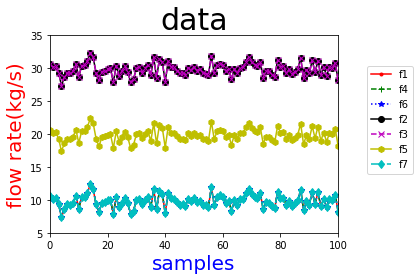

In [ ]:
q = list(plt.plot(f1,"r.-",f4,"g+--",f6,"b*:",f2,"ko-",f3,"mx--",f5,"yh-",f7,"cd-."))
plt.ylim(5,35)
plt.xlim(0,100)
plt.xlabel("samples",{"size" : 20,"color" : "blue"})
plt.ylabel("flow rate(kg/s)",{"size" : 20,"color" : "red"})
plt.title("data",{"size" : 30})
plt.legend(q,['f1','f4','f6','f2','f3','f5','f7'],loc = (1.1,0.3))
plt.tight_layout()
plt.show()

In [ ]:
df1 = pd.DataFrame(list(zip(f1,f1o)),columns = ['data','output'])
df2 = pd.DataFrame(list(zip(f2,f2o)),columns = ['data','output'])
df3 = pd.DataFrame(list(zip(f3,f3o)),columns = ['data','output'])
df4 = pd.DataFrame(list(zip(f4,f4o)),columns = ['data','output'])
df5 = pd.DataFrame(list(zip(f5,f5o)),columns = ['data','output'])
df6 = pd.DataFrame(list(zip(f6,f6o)),columns = ['data','output'])
df7 = pd.DataFrame(list(zip(f7,f7o)),columns = ['data','output'])

df_f = pd.concat([df1, df2,df3,df4,df5,df6,df7], ignore_index=True)
print(df_f)
df_final = df_f.sample(frac=1).reset_index(drop=True)
print(df_final)


df_f1 = pd.concat([df1], ignore_index=True)
print(df_f1)
df_f2 = pd.concat([df2], ignore_index=True)
print(df_f2)
df_f3 = pd.concat([df3], ignore_index=True)
print(df_f3)
df_f4 = pd.concat([df4], ignore_index=True)
print(df_f4)
df_f5 = pd.concat([df5], ignore_index=True)
print(df_f5)
df_f6 = pd.concat([df6], ignore_index=True)
print(df_f6)
df_f7 = pd.concat([df7], ignore_index=True)
print(df_f7)


            data  output
0      10.587232      10
1      10.197184      10
2      10.329027      10
3       9.331099      10
4       7.357596      10
...          ...     ...
69995  10.393978      10
69996   9.342774      10
69997   9.698424      10
69998  10.618044      10
69999   8.859079      10

[70000 rows x 2 columns]
            data  output
0       9.430991      10
1       9.930864      10
2       9.605909      10
3      20.102824      20
4       9.637782      10
...          ...     ...
69995  30.598944      30
69996  11.279223      10
69997  30.004650      30
69998  11.323677      10
69999   9.581015      10

[70000 rows x 2 columns]
           data  output
0     10.587232      10
1     10.197184      10
2     10.329027      10
3      9.331099      10
4      7.357596      10
...         ...     ...
9995  10.393978      10
9996   9.342774      10
9997   9.698424      10
9998  10.618044      10
9999   8.859079      10

[10000 rows x 2 columns]
           data  output
0     30.5

In [ ]:
x_train = df_f.loc[:69999,['data']]
y_train = df_f.loc[:69999,['output']]



#f1

x_test1 = df_f1.loc[9000:,['data']]
y_test1 = df_f1.loc[9000:,['output']]

#f2

x_test2 = df_f2.loc[9000:,['data']]
y_test2 = df_f2.loc[9000:,['output']]

#f3

x_test3 = df_f3.loc[9000:,['data']]
y_test3 = df_f3.loc[9000:,['output']]

#f4
x_train4 = df_f4.loc[:8999,['data']]
x_test4 = df_f4.loc[9000:,['data']]
y_train4 = df_f4.loc[:8999,['output']]
y_test4 = df_f4.loc[9000:,['output']]

#f5

x_test5 = df_f5.loc[9000:,['data']]
y_test5 = df_f5.loc[9000:,['output']]

#f6

x_test6 = df_f6.loc[9000:,['data']]
y_test6 = df_f6.loc[9000:,['output']]

#f7

x_test7 = df_f7.loc[9000:,['data']]
y_test7 = df_f7.loc[9000:,['output']]


In [ ]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 1024, activation = 'elu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(keras.layers.Dense(units = 256, activation = 'elu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(keras.layers.Dense(units = 64, activation = 'elu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))

opt =tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")
model.compile(loss = "mean_squared_error",optimizer=opt,metrics=['mae'])

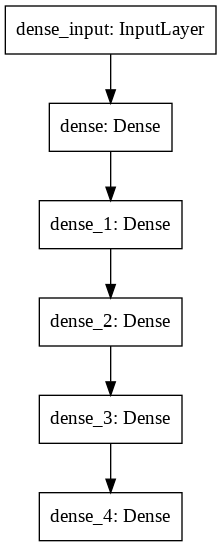

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 280,963
Trainable params: 280,963
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train, y_train, epochs=45, batch_size=35,validation_split=0.15,validation_data=None,verbose=1)





Epoch 1/45
1700/1700 [==============================] - 10s 6ms/step - loss: 28.2087 - mae: 1.3736 - val_loss: 6.3754 - val_mae: 0.6772
Epoch 2/45
1700/1700 [==============================] - 10s 6ms/step - loss: 4.8176 - mae: 0.7067 - val_loss: 1.4296 - val_mae: 0.1553
Epoch 3/45
1700/1700 [==============================] - 10s 6ms/step - loss: 1.7022 - mae: 0.5252 - val_loss: 0.7368 - val_mae: 0.2040
Epoch 4/45
1700/1700 [==============================] - 9s 6ms/step - loss: 1.1313 - mae: 0.4993 - val_loss: 0.4496 - val_mae: 0.1018
Epoch 5/45
1700/1700 [==============================] - 9s 5ms/step - loss: 0.9492 - mae: 0.4956 - val_loss: 0.3486 - val_mae: 0.1298
Epoch 6/45
1700/1700 [==============================] - 9s 6ms/step - loss: 0.8577 - mae: 0.4849 - val_loss: 0.3096 - val_mae: 0.1247
Epoch 7/45
1700/1700 [==============================] - 9s 5ms/step - loss: 0.7896 - mae: 0.4707 - val_loss: 0.2376 - val_mae: 0.0547
Epoch 8/45
1700/1700 [==============================] - 9s

In [ ]:
keras.backend.clear_session()

In [ ]:
f1x =10+re
f4x =10+re
f6x =10+re
f2x=30+re
f3x=30+re
f5x=20+re
f7x=10+re

In [ ]:
def gross_add(s,b):
  k=s-b
  
  for i in range(0,10000):
   
    if k[i]>-3 and k[i]<-2:
      s[i]+=8
    elif k[i]>-2 and k[i]<-1:
      s[i]+=7
    elif k[i]>-1 and k[i]<0:
      s[i]+=6
    elif k[i]>0 and k[i]<1:
      s[i]+=5
    elif k[i]>1 and k[i]<2:
      s[i]+=4
    elif k[i]>2 and k[i]<3:
      s[i]+=3
    elif k[i]<-3:
      s[i]+=9
    elif k[i]>3:
      s[i]+=2

  return s

In [ ]:
f1gg=gross_add(f1x,f1o)

In [ ]:
f2gg=gross_add(f2x,f2o)

In [ ]:
print(f2gg)

[35.58723156 35.19718374 35.32902677 ... 35.69842417 35.61804357
 35.85907913]


In [ ]:
k2gg=model.predict(f2gg)

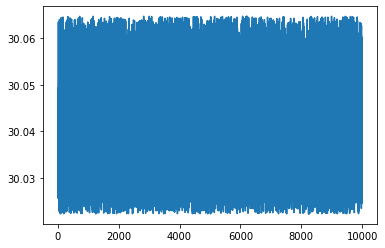

In [ ]:
plt.plot(k2gg)

In [ ]:
f1x=10+re

In [ ]:
print(max(re))

3.8034336168841074


In [ ]:
print(f1x-10)

[ 0.58723156  0.19718374  0.32902677 ... -0.30157583  0.61804357
 -1.14092087]


In [ ]:
print(max(f1x))

13.803433616884107


In [ ]:
k1x=model.predict(f1x)
k2x=model.predict(f2x)
k3x=model.predict(f3x)
k4x=model.predict(f4x)
k5x=model.predict(f5x)
k6x=model.predict(f6x)
k7x=model.predict(f7x)

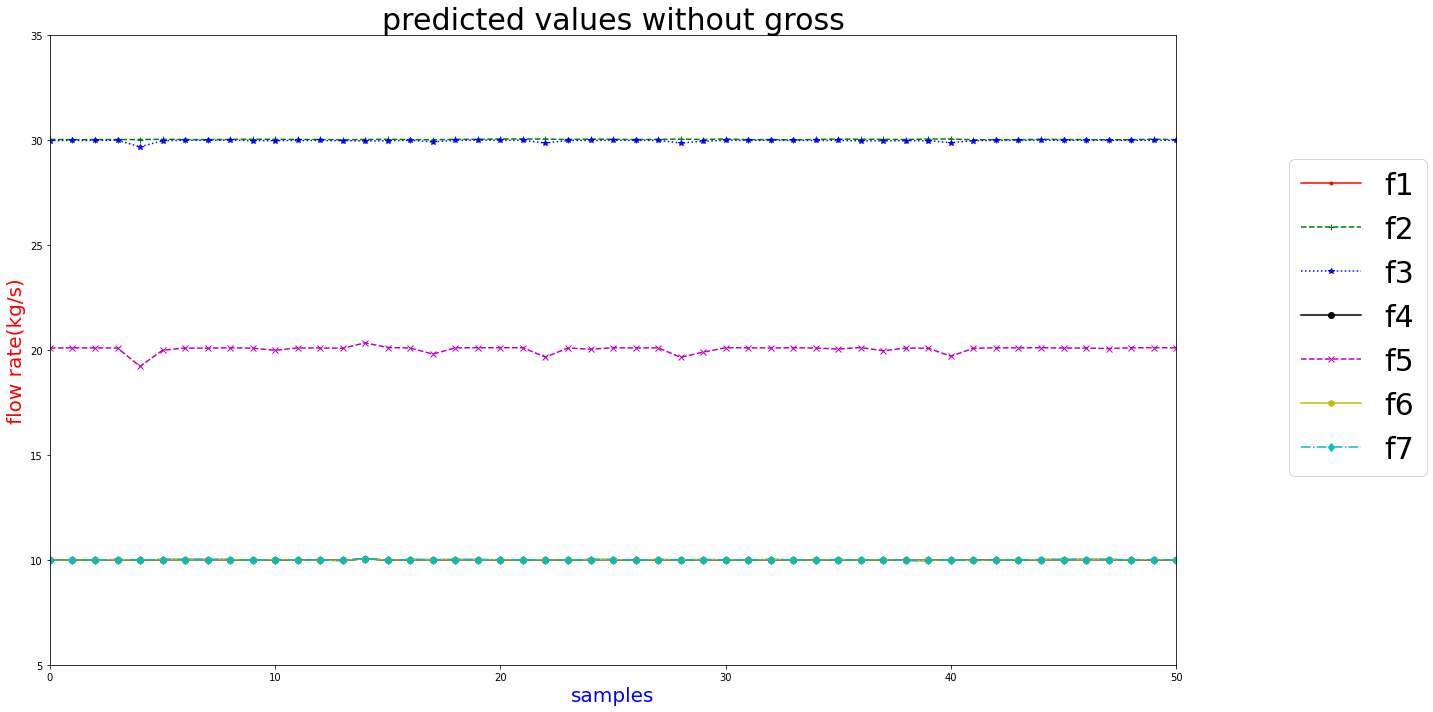

In [ ]:
#ploting the graphs

plt.figure(5,figsize=(20,10))
q = list(plt.plot(k1x,"r.-",k2x,"g+--",k3x,"b*:",k4x,"ko-",k5x,"mx--",k6x,"yh-",k7x,"cd-."))
plt.ylim(5,35)
plt.xlim(0,50)
plt.xlabel("samples",{"size" : 20,"color" : "blue"})
plt.ylabel("flow rate(kg/s)",{"size" : 20,"color" : "red"})
plt.title("predicted values without gross",{"size" : 30})
plt.legend(q,['f1','f2','f3','f4','f5','f6','f7'],loc = (1.1,0.3),prop={'size': 30})
plt.tight_layout()
plt.show()

In [ ]:
import math

In [ ]:
ge=np.random.normal(0,math.sqrt(5),10000)

In [ ]:
ge=2

In [ ]:
f1xg=f1x+ge

In [ ]:
k1xx=model.predict(f1xg)

In [ ]:
yx=np.arange(0,10000,1)

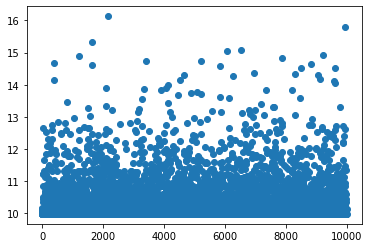

In [ ]:
plt.scatter(yx,k1xx[0:len(yx)])

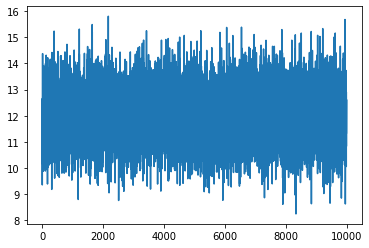

In [ ]:
plt.plot(f1xg)

In [ ]:
x1=abs(k1xx-10)

In [ ]:
y1=abs(f1xg-10)

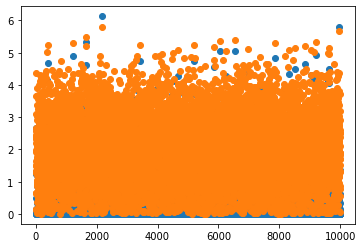

In [ ]:
plt.scatter(yx,x1[0:len(yx)])
plt.scatter(yx,y1[0:len(yx)])

In [ ]:
# countx=0
# county=0
# for i in range(0,10000):
#   if y1[i]<2.5 and x1[i]>2.5:
#     countx+=1
#   elif y1[i]>2.5 and x1[i]<2.5:
#     county+=1


In [ ]:
k1xx=model.predict(f1xg)
k2xx=model.predict(f2x)
k3xx=model.predict(f3x)
k4xx=model.predict(f4x)
k5xx=model.predict(f5x)
k6xx=model.predict(f6x)
k7xx=model.predict(f7x)

In [ ]:
"""Op calculation(Overall Power)
OP= (no. biased variables correctly identified)/(no. of samples) """

def OPcal(a):#biased sensor
  count=0
  cx=0
  for i in range(0,10000):
    if a[i]>2.5 
      count+=1
  op=count/10000
  return op
"""AVTI calculation(average type 1 error)
AVTI= (no. non biased variables wrongly identified)/(no. of samples) """
def AVTIcal(a,b,c,d,e,f,g,cs,bs):
  count=0
  if a is not cs:
    for i in range(0,10000):
      if a[i] >2.5:
        count+=1
  elif a is cs:
    for i in range(0,10000):
      if a[i]>2.5 and bs[i]<2.5:
        count+=1
   
  if b is not cs:
    for i in range(0,10000):
      if b[i] >2.5:
        count+=1
  elif b is cs:
    for i in range(0,10000):
      if b[i]>2.5 and bs[i]<2.5:
        count+=1
  if c is not cs:
    for i in range(0,10000):
      if c[i] >2.5:
        count+=1
  elif c is cs:
    for i in range(0,10000):
      if c[i]>2.5 and bs[i]<2.5:
        count+=1
  if d is not cs:
    for i in range(0,10000):
      if d[i] >2.5:
        count+=1
  elif d is cs:
    for i in range(0,10000):
      if d[i]>2.5 and bs[i]<2.5:
        count+=1  
  if e is not cs:
    for i in range(0,10000):
      if e[i] >2.5:
        count+=1
  elif e is cs:
    for i in range(0,10000):
      if exec[i]>2.5 and bs[i]<2.5:
        count+=1
  if f is not cs:
    for i in range(0,10000):
      if f[i] >2.5:
        count+=1
  elif f is cs:
    for i in range(0,10000):
      if f[i]>2.5 and bs[i]<2.5:
        count+=1
  if g is not cs:
    for i in range(0,10000):
      if g[i] >2.5:
        count+=1
  elif g is cs:
    for i in range(0,10000):
      if g[i]>2.5 and bs[i]<2.5:
        count+=1     
  avti=count/70000
  return avti
  """OPF calculation(Overall perfrperformance)
AVTI= (no. trails with perfect identification)/(no. of samples) """
def OPFcal(a,b,c,d,e,f,g,cs,bs):
  count=0
  if a is not cs:
    for i in range(0,10000):
      if a[i] <2.5:
        count+=1
  elif a is cs:
    for i in range(0,10000):
      if a[i]>2.5 and bs[i]>2.5:
        count+=1
   
  if b is not cs:
    for i in range(0,10000):
      if b[i] <2.5:
        count+=1
  elif b is cs:
    for i in range(0,10000):
      if b[i]>2.5 and bs[i]>2.5:
        count+=1
  if c is not cs:
    for i in range(0,10000):
      if c[i] <2.5:
        count+=1
  elif c is cs:
    for i in range(0,10000):
      if c[i]>2.5 and bs[i]>2.5:
        count+=1
  if d is not cs:
    for i in range(0,10000):
      if d[i] <2.5:
        count+=1
  elif d is cs:
    for i in range(0,10000):
      if d[i]>2.5 and bs[i]>2.5:
        count+=1  
  if e is not cs:
    for i in range(0,10000):
      if e[i] <2.5:
        count+=1
  elif e is cs:
    for i in range(0,10000):
      if exec[i]>2.5 and bs[i]>2.5:
        count+=1
  if f is not cs:
    for i in range(0,10000):
      if f[i] <2.5:
        count+=1
  elif f is cs:
    for i in range(0,10000):
      if f[i]>2.5 and bs[i]>2.5:
        count+=1
  if g is not cs:
    for i in range(0,10000):
      if g[i] <2.5:
        count+=1
  elif g is cs:
    for i in range(0,10000):
      if g[i]>2.5 and bs[i]>2.5:
        count+=1     
  OPF=count/70000
  #assasd
  # if a is b:
  #   for i in range(0,10000):
  #     if a[i]>2.5:
  #       count+=1
  # if a is not  b:
  #   for i in range(0,10000):
  #     if a[i]<2.5:
  #       count+=1
  # OPF=count/10000
  return OPF



SyntaxError: ignored

In [ ]:
diff1= abs(k1xx-10)
diff2= abs(k2xx-30)
diff3= abs(k3xx-30)
diff4= abs(k4xx-10)
diff5= abs(k5xx-20)
diff6= abs(k6xx-10)
diff7= abs(k7xx-10)


In [ ]:
# OP1=OPcal(diff1,diff1)
# OP2=OPcal(diff2,diff1)
# OP3=OPcal(diff3,diff1)
# OP4=OPcal(diff4,diff1)
# OP5=OPcal(diff5,diff1)
# OP6=OPcal(diff6,diff1)
# OP7=OPcal(diff7,diff1)

# avti1=AVTIcal(diff1,diff1)
# avti2=AVTIcal(diff2,diff1)
# avti3=AVTIcal(diff3,diff1)
# avti4=AVTIcal(diff4,diff1)
# avti5=AVTIcal(diff5,diff1)
# avti6=AVTIcal(diff6,diff1)
# avti7=AVTIcal(diff7,diff1)

# OPF1=OPFcal(diff1,diff1)
# OPF2=OPFcal(diff2,diff1)
# OPF3=OPFcal(diff3,diff1)
# OPF4=OPFcal(diff4,diff1)
# OPF5=OPFcal(diff5,diff1)
# OPF6=OPFcal(diff6,diff1)
# OPF7=OPFcal(diff7,diff1)

In [ ]:
result = [["OP","AVTI","OPF"],[OP1,avti1,OPF1], [OP2,avti2,OPF2], [OP3,avti3,OPF3],[OP4,avti4,OPF4],[OP5,avti5,OPF5],[OP6,avti6,OPF6],[OP7,avti7,OPF7]]

print(tabulate(result))

In [ ]:
f1xg=f1x+ge
k1xx1=model.predict(f1xg)
k2xx1=model.predict(f2x)
k3xx1=model.predict(f3x)
k4xx1=model.predict(f4x)
k5xx1=model.predict(f5x)
k6xx1=model.predict(f6x)
k7xx1=model.predict(f7x)

diff1a= abs(k1xx1-10)
diff2a= abs(k2xx1-30)
diff3a= abs(k3xx1-30)
diff4a= abs(k4xx1-10)
diff5a= abs(k5xx1-20)
diff6a= abs(k6xx1-10)
diff7a= abs(k7xx1-10)


gr_res1=abs(f1xg-10)
OP1=OPcal(diff1a,gr_res1)
print(OP1)


avti1=AVTIcal(diff1a,diff2a,diff3a,diff4a,diff5a,diff6a,diff7a,diff1a,gr_res1)
print(avti1)
OPF1=OPFcal(diff1a,diff2a,diff3a,diff4a,diff5a,diff6a,diff7a,diff1a,gr_res1)
print(OPF1)

In [ ]:
print(gr_res2)

In [ ]:
plt.plot(k2xx2)

In [ ]:
f2xg=f2x-ge
k1xx2=model.predict(f1x)
k2xx2=model.predict(f2xg)
k3xx2=model.predict(f3x)
k4xx2=model.predict(f4x)
k5xx2=model.predict(f5x)
k6xx2=model.predict(f6x)
k7xx2=model.predict(f7x)

diff1b= abs(k1xx2-10)
diff2b= abs(k2xx2-30)
diff3b= abs(k3xx2-30)
diff4b= abs(k4xx2-10)
diff5b= abs(k5xx2-20)
diff6b= abs(k6xx2-10)
diff7b= abs(k7xx2-10)


gr_res2=abs(f2xg-30)
OP2=OPcal(diff2b,gr_res2)
print(OP2)
avti2=AVTIcal(diff1b,diff2b,diff3b,diff4b,diff5b,diff6b,diff7b,diff1b,gr_res2)
print(avti2)
OPF2=OPFcal(diff1b,diff2b,diff3b,diff4b,diff5b,diff6b,diff7b,diff1b,gr_res2)
print(OPF2)

In [ ]:
f3xg=f3x-ge
k1xx3=model.predict(f1x)
k2xx3=model.predict(f2x)
k3xx3=model.predict(f3xg)
k4xx3=model.predict(f4x)
k5xx3=model.predict(f5x)
k6xx3=model.predict(f6x)
k7xx3=model.predict(f7x)

diff1c= abs(k1xx3-10)
diff2c= abs(k2xx3-30)
diff3c= abs(k3xx3-30)
diff4c= abs(k4xx3-10)
diff5c= abs(k5xx3-20)
diff6c= abs(k6xx3-10)
diff7c= abs(k7xx3-10)


gr_res3=abs(f3xg-30)
OP3=OPcal(diff3c,gr_res3)
print(OP3)
avti3=AVTIcal(diff1c,diff2c,diff3c,diff4c,diff5c,diff6c,diff7c,diff1c,gr_res3)
print(avti3)
OPF3=OPFcal(diff1c,diff2c,diff3c,diff4c,diff5c,diff6c,diff7c,diff1c,gr_res3)
print(OPF3)

In [ ]:
f4xg=f4x+ge
k1xx4=model.predict(f1x)
k2xx4=model.predict(f2x)
k3xx4=model.predict(f3x)
k4xx4=model.predict(f4xg)
k5xx4=model.predict(f5x)
k6xx4=model.predict(f6x)
k7xx4=model.predict(f7x)

diff1d= abs(k1xx4-10)
diff2d= abs(k2xx4-30)
diff3d= abs(k3xx4-30)
diff4d= abs(k4xx4-10)
diff5d= abs(k5xx4-20)
diff6d= abs(k6xx4-10)
diff7d= abs(k7xx4-10)


gr_res4=abs(f4xg-10)
OP4=OPcal(diff4d,gr_res4)
print(OP4)
avti4=AVTIcal(diff1d,diff2d,diff3d,diff4d,diff5d,diff6d,diff7d,diff1d,gr_res4)
print(avti4)
OPF4=OPFcal(diff1d,diff2d,diff3d,diff4d,diff5d,diff6d,diff7d,diff1d,gr_res4)
print(OPF4)

In [ ]:
f5xg=f5x+ge
k1xx5=model.predict(f1x)
k2xx5=model.predict(f2x)
k3xx5=model.predict(f3x)
k4xx5=model.predict(f4x)
k5xx5=model.predict(f5xg)
k6xx5=model.predict(f6x)
k7xx5=model.predict(f7x)

diff1e= abs(k1xx5-10)
diff2e= abs(k2xx5-30)
diff3e= abs(k3xx5-30)
diff4e= abs(k4xx5-10)
diff5e= abs(k5xx5-20)
diff6e= abs(k6xx5-10)
diff7e= abs(k7xx5-10)


gr_res5=abs(f5xg-20)
OP5=OPcal(diff5e,gr_res5)
print(OP5)
avti5=AVTIcal(diff1e,diff2e,diff3e,diff4e,diff5e,diff6e,diff7e,diff1e,gr_res5)
print(avti5)
OPF5=OPFcal(diff1e,diff2e,diff3e,diff4e,diff5e,diff6e,diff7e,diff1e,gr_res5)
print(OPF5)

In [ ]:
f6xg=f6x+ge
k1xx6=model.predict(f1x)
k2xx6=model.predict(f2x)
k3xx6=model.predict(f3x)
k4xx6=model.predict(f4x)
k5xx6=model.predict(f5x)
k6xx6=model.predict(f6xg)
k7xx6=model.predict(f7x)


diff1f= abs(k1xx6-10)
diff2f= abs(k2xx6-30)
diff3f= abs(k3xx6-30)
diff4f= abs(k4xx6-10)
diff5f= abs(k5xx6-20)
diff6f= abs(k6xx6-10)
diff7f= abs(k7xx6-10)


gr_res6=abs(f6xg-10)
OP6=OPcal(diff6f,gr_res6)
print(OP6)
avti6=AVTIcal(diff1f,diff2f,diff3f,diff4f,diff5f,diff6f,diff7f,diff1f,gr_res6)
print(avti6)
OPF6=OPFcal(diff1f,diff2f,diff3f,diff4f,diff5f,diff6f,diff7f,diff1f,gr_res6)
print(OPF6)

In [ ]:
f7xg=f7x+ge
k1xx7=model.predict(f1x)
k2xx7=model.predict(f2x)
k3xx7=model.predict(f3x)
k4xx7=model.predict(f4x)
k5xx7=model.predict(f5x)
k6xx7=model.predict(f6x)
k7xx7=model.predict(f7xg)

diff1g= abs(k1xx7-10)
diff2g= abs(k2xx7-30)
diff3g= abs(k3xx7-30)
diff4g= abs(k4xx7-10)
diff5g= abs(k5xx7-20)
diff6g= abs(k6xx7-10)
diff7g= abs(k7xx7-10)


gr_res7=abs(f7xg-10)
OP7=OPcal(diff6f,gr_res7)
print(OP7)
avti7=AVTIcal(diff1g,diff2g,diff3g,diff4g,diff5g,diff6g,diff7g,diff1e,gr_res7)
print(avti7)
OPF7=OPFcal(diff1g,diff2g,diff3g,diff4g,diff5g,diff6g,diff7g,diff1e,gr_res7)
print(OPF7)

In [ ]:
result = [["OP","AVTI","OPF"],[OP1,avti1,OPF1], [OP2,avti2,OPF2], [OP3,avti3,OPF3],[OP4,avti4,OPF4],[OP5,avti5,OPF5],[OP6,avti6,OPF6],[OP7,avti7,OPF7]]

print(tabulate(result))

In [ ]:
MSE1 = mean_squared_error(f1o, k1xx1)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(f2o, k2xx1)
RMSE2 = math.sqrt(MSE2)
MSE3 = mean_squared_error(f3o, k3xx1)
RMSE3 = math.sqrt(MSE3)
MSE4 = mean_squared_error(f4o, k4xx1)
RMSE4 = math.sqrt(MSE4)
MSE5 = mean_squared_error(f5o, k5xx1)
RMSE5 = math.sqrt(MSE5)
MSE6 = mean_squared_error(f6o, k6xx1)
RMSE6 = math.sqrt(MSE6)
MSE7 = mean_squared_error(f7o, k7xx1)
RMSE7 = math.sqrt(MSE7)
print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7)

In [ ]:
MSE1 = mean_squared_error(f1o, k1xx2)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(f2o, k2xx2)
RMSE2 = math.sqrt(MSE2)
MSE3 = mean_squared_error(f3o, k3xx2)
RMSE3 = math.sqrt(MSE3)
MSE4 = mean_squared_error(f4o, k4xx2)
RMSE4 = math.sqrt(MSE4)
MSE5 = mean_squared_error(f5o, k5xx2)
RMSE5 = math.sqrt(MSE5)
MSE6 = mean_squared_error(f6o, k6xx2)
RMSE6 = math.sqrt(MSE6)
MSE7 = mean_squared_error(f7o, k7xx2)
RMSE7 = math.sqrt(MSE7)
print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7)

In [ ]:
MSE1 = mean_squared_error(f1o, k1xx3)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(f2o, k2xx3)
RMSE2 = math.sqrt(MSE2)
MSE3 = mean_squared_error(f3o, k3xx3)
RMSE3 = math.sqrt(MSE3)
MSE4 = mean_squared_error(f4o, k4xx3)
RMSE4 = math.sqrt(MSE4)
MSE5 = mean_squared_error(f5o, k5xx3)
RMSE5 = math.sqrt(MSE5)
MSE6 = mean_squared_error(f6o, k6xx3)
RMSE6 = math.sqrt(MSE6)
MSE7 = mean_squared_error(f7o, k7xx3)
RMSE7 = math.sqrt(MSE7)
print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7)

In [ ]:
MSE1 = mean_squared_error(f1o, k1xx4)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(f2o, k2xx4)
RMSE2 = math.sqrt(MSE2)
MSE3 = mean_squared_error(f3o, k3xx4)
RMSE3 = math.sqrt(MSE3)
MSE4 = mean_squared_error(f4o, k4xx4)
RMSE4 = math.sqrt(MSE4)
MSE5 = mean_squared_error(f5o, k5xx4)
RMSE5 = math.sqrt(MSE5)
MSE6 = mean_squared_error(f6o, k6xx4)
RMSE6 = math.sqrt(MSE6)
MSE7 = mean_squared_error(f7o, k7xx4)
RMSE7 = math.sqrt(MSE7)
print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7)

In [ ]:
MSE1 = mean_squared_error(f1o, k1xx5)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(f2o, k2xx5)
RMSE2 = math.sqrt(MSE2)
MSE3 = mean_squared_error(f3o, k3xx5)
RMSE3 = math.sqrt(MSE3)
MSE4 = mean_squared_error(f4o, k4xx5)
RMSE4 = math.sqrt(MSE4)
MSE5 = mean_squared_error(f5o, k5xx5)
RMSE5 = math.sqrt(MSE5)
MSE6 = mean_squared_error(f6o, k6xx5)
RMSE6 = math.sqrt(MSE6)
MSE7 = mean_squared_error(f7o, k7xx5)
RMSE7 = math.sqrt(MSE7)
print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7)

In [ ]:
MSE1 = mean_squared_error(f1o, k1xx6)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(f2o, k2xx6)
RMSE2 = math.sqrt(MSE2)
MSE3 = mean_squared_error(f3o, k3xx6)
RMSE3 = math.sqrt(MSE3)
MSE4 = mean_squared_error(f4o, k4xx6)
RMSE4 = math.sqrt(MSE4)
MSE5 = mean_squared_error(f5o, k5xx6)
RMSE5 = math.sqrt(MSE5)
MSE6 = mean_squared_error(f6o, k6xx6)
RMSE6 = math.sqrt(MSE6)
MSE7 = mean_squared_error(f7o, k7xx6)
RMSE7 = math.sqrt(MSE7)
print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7)

In [ ]:
MSE1 = mean_squared_error(f1o, k1xx7)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(f2o, k2xx7)
RMSE2 = math.sqrt(MSE2)
MSE3 = mean_squared_error(f3o, k3xx7)
RMSE3 = math.sqrt(MSE3)
MSE4 = mean_squared_error(f4o, k4xx7)
RMSE4 = math.sqrt(MSE4)
MSE5 = mean_squared_error(f5o, k5xx7)
RMSE5 = math.sqrt(MSE5)
MSE6 = mean_squared_error(f6o, k6xx7)
RMSE6 = math.sqrt(MSE6)
MSE7 = mean_squared_error(f7o, k7xx7)
RMSE7 = math.sqrt(MSE7)
print(RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7)